In [161]:
%matplotlib inline

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [163]:
trainIn = pd.read_table('spam_train.txt', header=None, names=['input'])
testIn = pd.read_table('spam_test.txt', header=None, names=['input'])

In [164]:
trainIn[:10]

,input
0,1 public announc the new domain name ar final ...
1,1 have tax problem do you ow the ir monei if y...
2,0 r robert harlei write r scuse me for post in...
3,0 on wed number oct number brian fahrland wrot...
4,0 quot ronan waid sure but soft link would do ...
5,0 i notic a low count of razor d spam messag s...
6,1 nigeria electirc power author feder secretar...
7,0 on mon number sep number tom wrote if the se...
8,0 shopper newslett alert live tech help now ap...
9,0 httpaddr summari split up from end in num pr...


In [165]:
trainIn['input'][0]

'1 public announc the new domain name ar final avail to the gener public at discount price now you can regist on of the excit new biz or info domain name as well as the origin com and net name for just dollarnumb number these brand new domain extens were recent approv by icann and have the same right as the origin com and net domain name the biggest benefit is of cours that the biz and info domain name ar current more avail i e it will be much easier to regist an attract and easi to rememb domain name for the same price visit httpaddr todai for more info regist your domain name todai for just dollarnumb number at httpaddr registr fee includ full access to an easi to us control panel to manag your domain name in the futur sincer domain administr afford domain to remov your email address from further promot mail from thi compani click here httpaddr number numberreyonumb numberzkcvnumbertdvrnumb numberilirnumberwysonumb numberauornumberjqxznumb numberlnumb'

In [166]:
# Parse out labels & convert 0 labels to -1
trainIn['spam_ind'] = [2*int(x[0])-1 for x in trainIn['input']]
trainIn['email_data'] = [x[1:] for x in trainIn['input']]
del trainIn['input']

testIn['spam_ind'] = [2*int(x[0])-1 for x in testIn['input']]
testIn['email_data'] = [x[1:] for x in testIn['input']]
del testIn['input']

In [167]:
trainIn[:10]

,spam_ind,email_data
0,1,public announc the new domain name ar final a...
1,1,have tax problem do you ow the ir monei if yo...
2,-1,r robert harlei write r scuse me for post in ...
3,-1,on wed number oct number brian fahrland wrote...
4,-1,quot ronan waid sure but soft link would do t...
5,-1,i notic a low count of razor d spam messag so...
6,1,nigeria electirc power author feder secretari...
7,-1,on mon number sep number tom wrote if the set...
8,-1,shopper newslett alert live tech help now apr...
9,-1,httpaddr summari split up from end in num pro...


In [168]:
trainIn['email_data'][0]

' public announc the new domain name ar final avail to the gener public at discount price now you can regist on of the excit new biz or info domain name as well as the origin com and net name for just dollarnumb number these brand new domain extens were recent approv by icann and have the same right as the origin com and net domain name the biggest benefit is of cours that the biz and info domain name ar current more avail i e it will be much easier to regist an attract and easi to rememb domain name for the same price visit httpaddr todai for more info regist your domain name todai for just dollarnumb number at httpaddr registr fee includ full access to an easi to us control panel to manag your domain name in the futur sincer domain administr afford domain to remov your email address from further promot mail from thi compani click here httpaddr number numberreyonumb numberzkcvnumbertdvrnumb numberilirnumberwysonumb numberauornumberjqxznumb numberlnumb'

In [169]:
counts = pd.DataFrame(trainIn['spam_ind'].value_counts())
pcts = pd.DataFrame(trainIn['spam_ind'].value_counts(normalize=True))
summ = pd.merge(counts, pcts, suffixes=('_count', '_pct'), left_index=True, right_index=True)

In [170]:
summ

,spam_ind_count,spam_ind_pct
-1,3430,0.686
1,1570,0.314


In [171]:
# 1. Split overall training set into training set and validate set
# typicall would select random inputs into train & validate
train = pd.DataFrame(trainIn[:4000])
validate = pd.DataFrame(trainIn[4000:])

In [172]:
trainingSumm = pd.merge(pd.DataFrame(train['spam_ind'].value_counts()), pd.DataFrame(train['spam_ind'].value_counts(normalize=True)),
                        suffixes=('_count', '_pct'), left_index=True, right_index=True)
print('Training Set Summary:')
trainingSumm

Training Set Summary:


,spam_ind_count,spam_ind_pct
-1,2745,0.68625
1,1255,0.31375


In [173]:
validationSumm = pd.merge(pd.DataFrame(validate['spam_ind'].value_counts()), pd.DataFrame(validate['spam_ind'].value_counts(normalize=True)),
                          suffixes=('_count', '_pct'), left_index=True, right_index=True)
print('Validation Set Summary:')
validationSumm

Validation Set Summary:


,spam_ind_count,spam_ind_pct
-1,685,0.685
1,315,0.315


In [174]:
train['email_data'][0]

' public announc the new domain name ar final avail to the gener public at discount price now you can regist on of the excit new biz or info domain name as well as the origin com and net name for just dollarnumb number these brand new domain extens were recent approv by icann and have the same right as the origin com and net domain name the biggest benefit is of cours that the biz and info domain name ar current more avail i e it will be much easier to regist an attract and easi to rememb domain name for the same price visit httpaddr todai for more info regist your domain name todai for just dollarnumb number at httpaddr registr fee includ full access to an easi to us control panel to manag your domain name in the futur sincer domain administr afford domain to remov your email address from further promot mail from thi compani click here httpaddr number numberreyonumb numberzkcvnumbertdvrnumb numberilirnumberwysonumb numberauornumberjqxznumb numberlnumb'

In [175]:
# 2. Transform all the data into feature vectors

#    Find all the words that occur in the training set
totalVocab = {}
# keys = words
# values = counts
for mail in train['email_data']:
    # use set so that you only count each word max 1X per email
    for word in set(mail.split()):
        totalVocab.setdefault(word, 0)
        totalVocab[word] += 1

print('Number of words in total vocabulary: '+str(len(totalVocab.keys())))

Number of words in total vocabulary: 55232


In [176]:
# Ignore all words that appear in fewer than X = 30 e-mails of the 4000 e-mail training set
# (i.e. remove all words occuring in fewer than X=30 e-mails)
narrowedVocab = {word:count for word, count in zip(totalVocab.keys(), totalVocab.values()) if count >= 30}

In [177]:
print('Minimum Number of occurrences: '+str(min(narrowedVocab.values())))
print('Number of words in narrowed vocabulary: '+str(len(narrowedVocab.keys())))
print('Percentage of total vocabulary in narrowed vocabulary: '+'{:2.2f}'.format(len(narrowedVocab.keys())*100/len(totalVocab.keys()))+'%')

Minimum Number of occurrences: 30
Number of words in narrowed vocabulary: 2376
Percentage of total vocabulary in narrowed vocabulary: 4.30%


In [178]:
# For each email, transform it into a feature vector x where the ith entry, xi, 
# is 1 if the ith word in the vocabulary occurs in the email, and 0 otherwise.

# Arrays to hold the feature vectors
trainFeatures = np.empty((train['email_data'].size, len(narrowedVocab.keys())), dtype=int)
validateFeatures = np.empty((validate['email_data'].size, len(narrowedVocab.keys())), dtype=int)

In [179]:
# populate training set array
words = narrowedVocab.keys()
for i in range(0, train['email_data'].size):
    j=0
    split_word = set(train['email_data'][i].split())
    for word in words:
        if word in split_word:
            trainFeatures[i][j] = 1
        else:
            trainFeatures[i][j] = 0
        j = j+1

In [180]:
print(trainFeatures.shape)
print(trainFeatures.sum(axis=0))
print(trainFeatures.sum(axis=0).shape)
print(trainFeatures.sum(axis=0).min())

(4000, 2376)
[  75 3154 2995 ...,   33   33   44]
(2376,)
30


In [181]:
# populate validation set array
for i in validate.index:
    j=0
    split_word = set(validate['email_data'][i].split())
    for word in words:
        if word in split_word:
            validateFeatures[i-validate.index[0]][j] = 1
        else:
            validateFeatures[i-validate.index[0]][j] = 0
        j = j + 1

In [182]:
print(validateFeatures.shape)
print(validateFeatures.sum(axis=0))
print(validateFeatures.sum(axis=0).shape)
print(validateFeatures.sum(axis=0).min())

(1000, 2376)
[ 18 782 749 ...,   7  13  13]
(2376,)
3


In [183]:
# put array values into data frames
ind = 0
for word in narrowedVocab.keys():
    train[word]=trainFeatures[:,ind]
    validate[word]=validateFeatures[:,ind]
    ind = ind + 1

In [184]:
del train['email_data']
del validate['email_data']

In [185]:
train[:10]

,spam_ind,brand,and,httpaddr,administr,easier,have,easi,control,biggest,...,complic,plugin,expos,concept,crazi,chines,approxim,newspap,weapon,invit
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# 3. Implement the functions perceptron_train(data) and perceptron_test(w, data).

# The function perceptron train(data) trains a perceptron classifer using the examples
# provided to the function, and should return ~w, k, and iter, the final classification vector,
# the number of updates (mistakes) performed, and the number of passes through the data, respectively. 

# You may assume that the input data provided to your function is linearly
# separable (so the stopping criterion should be that all points are correctly classified).

In [187]:
def perceptron_train(data, labels, stop=20):
    
    prediction = np.zeros((labels.shape), dtype=int)
    weightVector = np.zeros((data.shape[1]), dtype=float)
    numMistakes = 0
    epochs = 0
    
    for iter in range(0, stop):
        for i in range(0, data.shape[0]):
            if np.vdot(weightVector, data[i]) >= 0:
                prediction[i] = 1
            else:
                prediction[i] = -1
            if prediction[i]*labels[i] == -1:
                numMistakes = numMistakes + 1
                weightVector = weightVector + labels[i]*data[i]
        epochs = epochs+1
        if np.min(np.multiply(prediction, labels)) > 0:
            break
            
    return weightVector, numMistakes, epochs

In [188]:
def perceptron_test(weightVector, data, labels):
    numMistakes = 0
    prediction = np.zeros((labels.shape), dtype=int)
    
    # For an actual implementation and not this problem set, re-permute the order of the data examples 
    # before each iteration
    
    for i in range(0, data.shape[0]):
        if np.vdot(weightVector, data[i]) >= 0:
            prediction[i] = 1
        else:
            prediction[i] = -1
        if prediction[i]*labels[i] == -1:
            numMistakes = numMistakes + 1
    
    return float(numMistakes)/data.shape[0]

In [189]:
train.iloc[:, 1:].values.shape

(4000, 2376)

In [190]:
train.iloc[:, 0:1].values.shape

(4000, 1)

In [191]:
# 4. Train the linear classifier using your training set. 
# TO DO: change train.values to select all cols of train EXCEPT spam_int; trainLabels.values
w, k, iters = perceptron_train(train.iloc[:, 1:].values, train.iloc[:, 0:1].values)

In [192]:
print(str(k)+' mistakes are made before the algorithm terminates')

447 mistakes are made before the algorithm terminates


In [193]:
print('The algorithm made '+str(iters)+' passes through the data')

The algorithm made 11 passes through the data


In [194]:
# Test your implementation of perceptron test by running it with
# the learned parameters and the training data, making sure that the training error is zero.
error = perceptron_test(w, train.iloc[:, 1:].values, train.iloc[:, 0:1].values)
print('The training error is '+str(error))

The training error is 0.0


In [195]:
# Next, classify the emails in your validation set. What is the validation error?
error = perceptron_test(w, validate.iloc[:, 1:].values, validate.iloc[:, 0:1].values)
print('The validation error is '+str(error))

The validation error is 0.02


In [196]:
# 5. To better understand how the spam classifier works, we can inspect the parameters to see
# which words the classifier thinks are the most predictive of spam. 
sortedWeights = np.sort(w)
mostPos = set(sortedWeights[-15:])
mostNeg = set(sortedWeights[:15])
print(mostPos)
print(mostNeg)

{13.0, 14.0, 15.0, 16.0, 17.0, 19.0}
{-15.0, -14.0, -13.0, -12.0, -11.0}


In [197]:
# Using the vocabulary list together with the parameters learned in the previous question, output the 15 words
# with the most positive weights. What are they? 
        
for weight in mostPos:
    for i in range(0, len(w)):
        if w[i]==weight:
            print(str(w[i])+', '+train.columns[1+i])

13.0, am
13.0, major
14.0, your
14.0, present
14.0, ever
14.0, deathtospamdeathtospamdeathtospam
15.0, these
15.0, click
15.0, pleas
15.0, nbsp
15.0, market
15.0, guarante
16.0, remov
16.0, yourself
17.0, our
19.0, sight


In [198]:
# Which 15 words have the most negative weights?

for weight in mostNeg:
    for i in range(0, len(w)):
        if w[i] == weight:
            print(str(w[i])+', '+train.columns[1+i])

-15.0, but
-15.0, wrote
-15.0, prefer
-14.0, and
-13.0, i
-13.0, reserv
-12.0, on
-12.0, still
-12.0, technolog
-11.0, sinc
-11.0, copyright
-11.0, url
-11.0, instead
-11.0, upgrad
-11.0, recipi


In [199]:
# 6. Implement the averaged perceptron algorithm, which is the same as your current imple-
# mentation but which, rather than returning the final weight vector, returns the average
# of all weight vectors considered during the algorithm (including examples where no mis-
# take was made). Averaging reduces the variance between the different vectors, and is a
# powerful means of preventing the learning algorithm from overfitting (serving as a type of
# regularization).

In [200]:
def avg_perceptron_train(data, labels, stop=20):
    
    prediction = np.zeros((labels.shape), dtype=int)
    weightVector = np.zeros((data.shape[1]), dtype=float)
    sumWeightVector = np.zeros((data.shape[1]), dtype=float)
    numMistakes = 0
    count = 0
    epochs = 0
    
    for iter in range(0, stop):
        for i in range(0, data.shape[0]):
            if np.vdot(weightVector, data[i]) >= 0:
                prediction[i] = 1
            else:
                prediction[i] = -1
            if prediction[i]*labels[i] == -1:
                numMistakes = numMistakes + 1
                weightVector = weightVector + labels[i]*data[i]
            sumWeightVector = np.add(sumWeightVector, weightVector)
            count = count+1
        epochs = epochs+1
        if np.min(np.multiply(prediction, labels)) > 0:
            break
            
    return sumWeightVector/float(count), numMistakes, epochs

In [201]:
# Train the averaged perceptron classifier using your training set. 
w, k, iters = avg_perceptron_train(train.iloc[:, 1:].values, train.iloc[:, 0:1].values)

In [202]:
# number of mistakes and iterations should be the same
print(k)
print(iters)

447
11


In [203]:
# Get error on train & validate sets using averaged perceptron
print('Training Error: ' + str(perceptron_test(w, train.iloc[:, 1:].values, train.iloc[:, 0:1].values)))
print('Validation Error: ' + str(perceptron_test(w, validate.iloc[:, 1:].values, validate.iloc[:, 0:1].values)))

Training Error: 0.00075
Validation Error: 0.018


In [204]:
# 7. One should expect that the test error decreases as the amount of training data increases.
# Using only the first N rows of your training data, run both the perceptron and the averaged
# perceptron algorithms on this smaller training set and evaluate the corresponding validation
# error (using all of the validation data). Do this for N = 100; 200; 400; 800; 2000; 4000, and
# create a plot of the validation error of both algorithms as a function of N.

In [205]:
# run both the perceptron and averaged perceptron on the smaller training sets
trainingSizes = [100, 200, 400, 800, 2000, 4000]
resultDF = pd.DataFrame(index=trainingSizes, 
                        columns = ['perceptron training err', 'avg perceptron training err',
                                   'perceptron validation err', 'avg perceptron validation err', 
                                   'perceptron mistakes', 'avg perceptron mistakes',
                                   'perceptron iters', 'avg perceptron iters'])
resultDF.index.name = 'training size'

In [206]:
for N in trainingSizes:
    w, k, iters = perceptron_train(train.iloc[:N, 1:].values, train.iloc[:N, 0:1].values)
    w_avg, k_avg, iters_avg = avg_perceptron_train(train.iloc[:N, 1:].values, train.iloc[:N, 0:1].values)
    resultDF.loc[N]['perceptron training err'] = perceptron_test(w, train.iloc[:N, 1:].values, train.iloc[:N, 0:1].values)
    resultDF.loc[N]['avg perceptron training err'] = perceptron_test(w_avg, train.iloc[:N, 1:].values, 
                                                                          train.iloc[:N, 0:1].values)
    resultDF.loc[N]['perceptron validation err'] = perceptron_test(w, validate.iloc[:, 1:].values, validate.iloc[:, 0:1].values)
    resultDF.loc[N]['avg perceptron validation err'] = perceptron_test(w_avg, validate.iloc[:, 1:].values, 
                                                                            validate.iloc[:, 0:1].values)
    resultDF.loc[N]['perceptron mistakes'] = k
    resultDF.loc[N]['avg perceptron mistakes'] = k_avg
    resultDF.loc[N]['perceptron iters'] = iters
    resultDF.loc[N]['avg perceptron iters'] = iters_avg

In [207]:
resultDF

,perceptron training err,avg perceptron training err,perceptron validation err,avg perceptron validation err,perceptron mistakes,avg perceptron mistakes,perceptron iters,avg perceptron iters
training size,,,,,,,,
100,0,0,0.076,0.083,32,32,6,6
200,0,0.01,0.074,0.07,39,39,3,3
400,0,0,0.041,0.036,84,84,6,6
800,0,0.00125,0.026,0.027,111,111,5,5
2000,0,0.0005,0.024,0.021,259,259,11,11
4000,0,0.00075,0.02,0.018,447,447,11,11


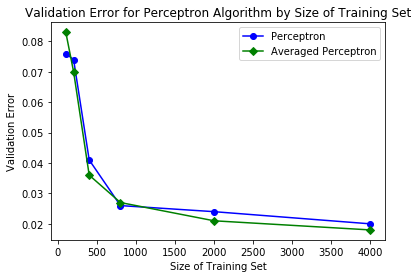

In [208]:
fig, ax = plt.subplots()
ax.plot(trainingSizes, resultDF['perceptron validation err'], 'bo-', label = 'Perceptron')
ax.plot(trainingSizes, resultDF['avg perceptron validation err'], 'gD-', label = 'Averaged Perceptron')
ax.legend(loc='upper right')
plt.xlabel('Size of Training Set')
plt.ylabel('Validation Error')
plt.title('Validation Error for Perceptron Algorithm by Size of Training Set')
plt.show()

In [209]:
# 8. Also for N = 100; 200; 400; 800; 2000; 4000, create a plot of the number of perceptron
# iterations as a function of N, where by iteration we mean a complete pass through the
# training data. As the amount of training data increases, the margin of the training set
# decreases, which generally leads to an increase in the number of iterations perceptron takes
# to converge (although it need not be monotonic).

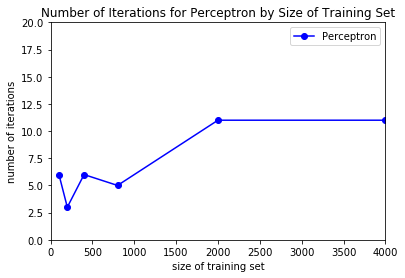

In [210]:
fig, ax = plt.subplots()
ax.set_xlim(0, 4000)
ax.set_ylim(0, 20)
ax.plot(trainingSizes, resultDF['perceptron iters'], 'bo-', label = 'Perceptron')
ax.legend(loc='upper right')
plt.xlabel('size of training set')
plt.ylabel('number of iterations')
plt.title('Number of Iterations for Perceptron by Size of Training Set')
plt.show()

In [211]:
# 9. One consequence of this is that the later iterations typically perform updates on only a
# small subset of the data points, which can contribute to overfitting. A way to solve this
# is to control the maximum number of iterations of the perceptron algorithm. Add an
# argument to both the perceptron and averaged perceptron algorithms that controls the
# maximum number of passes over the data.

# reflected above as parameter stop (default value = 20)

In [212]:
# 10. Congratulations, you now understand various properties of the perceptron algorithm. Try
# various configurations of the algorithms on your own using all 4000 training points, and
# find a good configuration having a low error on your validation set. In particular, try
# changing the choice of perceptron algorithm and the maximum number of iterations.

In [213]:
max_iters = np.arange(1, 12)

In [214]:
resultDF = pd.DataFrame(index=max_iters, columns=['perceptron train err', 'perceptron validation err',
                                                  'avg perceptron train err', 'avg perceptron validation err',
                                                  'perceptron mistakes', 'avg perceptron mistakes',
                                                  'perceptron iters', 'avg perceptron iters'])
resultDF.index.name = 'maximum iterations'

In [215]:
for theta in max_iters:
    w, k, iters = perceptron_train(train.iloc[:, 1:].values, train.iloc[:, 0:1].values, stop=theta)
    w_avg, k_avg, iters_avg = avg_perceptron_train(train.iloc[:, 1:].values, train.iloc[:, 0:1].values, stop=theta)
    resultDF.loc[theta]['perceptron train err'] = perceptron_test(w, train.iloc[:, 1:].values, train.iloc[:, 0:1].values)
    resultDF.loc[theta]['avg perceptron train err'] = perceptron_test(w_avg, train.iloc[:, 1:].values, 
                                                                          train.iloc[:, 0:1].values)
    resultDF.loc[theta]['perceptron validation err'] = perceptron_test(w, validate.iloc[:, 1:].values, validate.iloc[:, 0:1].values)
    resultDF.loc[theta]['avg perceptron validation err'] = perceptron_test(w_avg, validate.iloc[:, 1:].values, 
                                                                            validate.iloc[:, 0:1].values)
    resultDF.loc[theta]['perceptron mistakes'] = k
    resultDF.loc[theta]['avg perceptron mistakes'] = k_avg
    resultDF.loc[theta]['perceptron iters'] = iters
    resultDF.loc[theta]['avg perceptron iters'] = iters_avg

In [216]:
resultDF

,perceptron train err,perceptron validation err,avg perceptron train err,avg perceptron validation err,perceptron mistakes,avg perceptron mistakes,perceptron iters,avg perceptron iters
maximum iterations,,,,,,,,
1,0.0175,0.028,0.013,0.02,237,237,1,1
2,0.01225,0.029,0.00725,0.018,319,319,2,2
3,0.0275,0.047,0.00475,0.017,357,357,3,3
4,0.0035,0.018,0.00375,0.017,393,393,4,4
5,0.00675,0.027,0.002,0.016,408,408,5,5
6,0.001,0.024,0.00175,0.017,413,413,6,6
7,0.00075,0.02,0.0015,0.018,418,418,7,7
8,0.00275,0.025,0.00125,0.018,431,431,8,8
9,0.00025,0.02,0.001,0.017,444,444,9,9


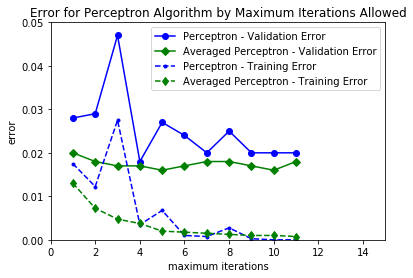

In [217]:
fig, ax = plt.subplots()
ax.set_xlim(0, 15)
ax.set_ylim(0, .05)
ax.plot(max_iters, resultDF['perceptron validation err'], 'bo-', label = 'Perceptron - Validation Error')
ax.plot(max_iters, resultDF['avg perceptron validation err'], 'gD-', label = 'Averaged Perceptron - Validation Error')
ax.plot(max_iters, resultDF['perceptron train err'], 'b.--', label = 'Perceptron - Training Error')
ax.plot(max_iters, resultDF['avg perceptron train err'], 'gd--', label = 'Averaged Perceptron - Training Error')
ax.legend(loc='upper right')
plt.xlabel('maximum iterations')
plt.ylabel('error')
plt.title('Error for Perceptron Algorithm by Maximum Iterations Allowed')
plt.show()

In [218]:
# Report the validation error for several of the configurations that you tried; 
# which configuration works best?

print('From chart, averaged perceptron validation error is always less than perceptron validation error.')
print('Minimum averaged perceptron validation error is '+str(resultDF['avg perceptron validation err'].min())+'.')

From chart, averaged perceptron validation error is always less than perceptron validation error.
Minimum averaged perceptron validation error is 0.016.


In [219]:
resultDF[resultDF['avg perceptron validation err']==0.016]

,perceptron train err,perceptron validation err,avg perceptron train err,avg perceptron validation err,perceptron mistakes,avg perceptron mistakes,perceptron iters,avg perceptron iters
maximum iterations,,,,,,,,
5,0.00675,0.027,0.002,0.016,408,408,5,5
10,0,0.02,0.001,0.016,447,447,10,10


In [220]:
print('Smallest validation error for averaged perceptron occurs at maximum iterations 5 and 10. Choose max iterations to be 5;')
print('no additional accuracy is obtained from further iterations and more computation time is used.')

Smallest validation error for averaged perceptron occurs at maximum iterations 5 and 10. Choose max iterations to be 5;
no additional accuracy is obtained from further iterations and more computation time is used.


In [221]:
# You are ready to train on the full training set, and see if it works on completely new data.
# Combine the training set and the validation set (i.e. use all of spam train.txt) and learn
# using the best of the configurations previously found. What is the error on the test set
# (i.e., now you finally use spam test.txt)?

In [222]:
train.index

RangeIndex(start=0, stop=4000, step=1)

In [223]:
validate.index

RangeIndex(start=4000, stop=5000, step=1)

In [224]:
train = train.append(validate)

In [225]:
w, k, iters = avg_perceptron_train(train.iloc[:, 1:].values, train.iloc[:, 0:1].values, stop=5)

In [226]:
trainingError = perceptron_test(w, train.iloc[:, 1:].values, train.iloc[:, 0:1].values)

In [227]:
testIn[:10]

,spam_ind,email_data
0,1,thi e mail ad is be sent in full complianc wi...
1,-1,i ve got a test set here that s the last numb...
2,-1,bonjour i m writ a python script in order to ...
3,1,hello unlimit intern telephon call market if ...
4,-1,it seem that an email consist of a singl line...
5,-1,bill stoddard wrote chuck murcko wrote heh te...
6,1,public announc the new name domain extens is ...
7,1,nbsp dear homeown nbsp number number number y...
8,-1,you should not be report spam to number numbe...
9,-1,number number javamail administr webnumb cont...


In [228]:
testSumm = pd.merge(pd.DataFrame(testIn['spam_ind'].value_counts()), pd.DataFrame(testIn['spam_ind'].value_counts(normalize=True)),
                        suffixes=('_count', '_pct'), left_index=True, right_index=True)
print('Test Set Summary:')
testSumm

Test Set Summary:


,spam_ind_count,spam_ind_pct
-1,693,0.693
1,307,0.307


In [229]:
testFeatures = np.empty((testIn['email_data'].size, len(narrowedVocab.keys())), dtype=int)

In [230]:
for i in range(0, testIn['email_data'].size):
    j=0
    split_word = set(testIn['email_data'][i].split())
    for word in words:
        if word in split_word:
            testFeatures[i][j] = 1
        else:
            testFeatures[i][j] = 0
        j = j+1

In [231]:
print(testFeatures.shape)
print(testFeatures.sum(axis=0))
print(testFeatures.sum(axis=0).shape)
print(testFeatures.sum(axis=0).min())

(1000, 2376)
[ 15 779 767 ...,   7   5  13]
(2376,)
0


In [232]:
# put array values into data frames
ind = 0
for word in narrowedVocab.keys():
    testIn[word]=testFeatures[:,ind]
    ind = ind + 1

In [233]:
del testIn['email_data']

In [234]:
testError = perceptron_test(w, testIn.iloc[:, 1:].values, testIn.iloc[:, 0:1].values)

In [235]:
print('Error on full training set was '+str(trainingError)+'.')
print('Error on test set was '+str(testError)+'.')

Error on full training set was 0.0026.
Error on test set was 0.019.
